In [73]:
import mne
import math
import numpy as np
import pandas as pd
import polars as pl
import datasets as ds
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
s001_r01_raw = mne.io.read_raw_edf('../../files/S001/S001R01.edf')

Extracting EDF parameters from F:\EEG_project\files\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [29]:
print(s001_r01_raw.info)
print(s001_r01_raw.ch_names)
print(s001_r01_raw.n_times)
print(s001_r01_raw.times)

<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
 subject_info: 3 items (dict)
>
['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
9760
[0.000000e+00 6.250000e-03 1.250000e-02 ... 6.098125e+01 6.098750e+01
 6.099375e+01]


In [53]:
data, times = s001_r01_raw[:]
ch_names = s001_r01_raw.ch_names

In [64]:
print(data.shape)
print(type(data))
print(data)
print(times.shape)
print(type(times))
print(times)
print(type(times[0]))
print(type(data[0][0]))

(64, 9760)
<class 'numpy.ndarray'>
[[-1.6e-05 -5.6e-05 -5.5e-05 ...  0.0e+00  0.0e+00  0.0e+00]
 [-2.9e-05 -5.4e-05 -5.5e-05 ...  0.0e+00  0.0e+00  0.0e+00]
 [ 2.0e-06 -2.7e-05 -2.9e-05 ...  0.0e+00  0.0e+00  0.0e+00]
 ...
 [-2.1e-05 -1.2e-05  2.0e-06 ...  0.0e+00  0.0e+00  0.0e+00]
 [-1.1e-05  1.0e-06  1.8e-05 ...  0.0e+00  0.0e+00  0.0e+00]
 [ 1.5e-05  2.1e-05  3.5e-05 ...  0.0e+00  0.0e+00  0.0e+00]]
(9760,)
<class 'numpy.ndarray'>
[0.000000e+00 6.250000e-03 1.250000e-02 ... 6.098125e+01 6.098750e+01
 6.099375e+01]
<class 'numpy.float64'>
<class 'numpy.float64'>


In [129]:
montage = s001_r01_raw.get_montage()
print(mne.channels.get_builtin_montages())

['standard_1005', 'standard_1020', 'standard_alphabetic', 'standard_postfixed', 'standard_prefixed', 'standard_primed', 'biosemi16', 'biosemi32', 'biosemi64', 'biosemi128', 'biosemi160', 'biosemi256', 'easycap-M1', 'easycap-M10', 'easycap-M43', 'EGI_256', 'GSN-HydroCel-32', 'GSN-HydroCel-64_1.0', 'GSN-HydroCel-65_1.0', 'GSN-HydroCel-128', 'GSN-HydroCel-129', 'GSN-HydroCel-256', 'GSN-HydroCel-257', 'mgh60', 'mgh70', 'artinis-octamon', 'artinis-brite23', 'brainproducts-RNP-BA-128']


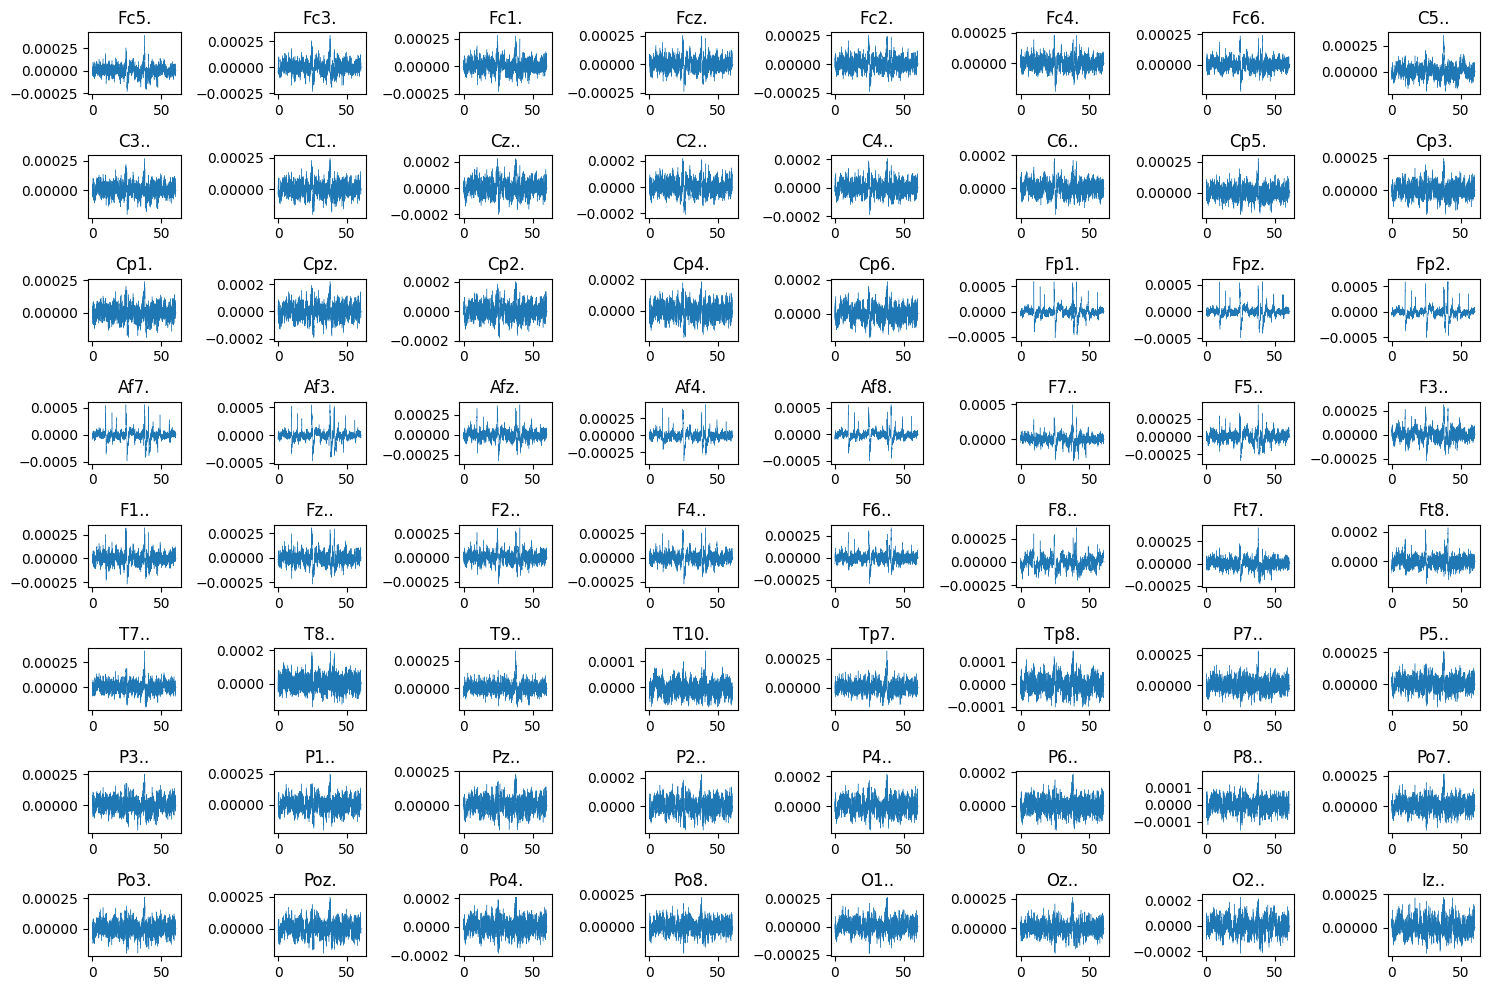

In [101]:
fig, axs = plt.subplots(nrows=8, ncols=8, figsize=(15, 10))
for i in range(8):
    for j in range(8):
        axs[i,j].plot(times, data[i*8+j], linewidth=0.3)
        axs[i,j].set_title(ch_names[i*8+j])
fig.tight_layout()
plt.show()
plt.close()

In [105]:
s001_r01_df = s001_r01_raw.to_data_frame()
display(s001_r01_df)

,time,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,...,P8..,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..
0,0.00000,-16.0,-29.0,2.0,22.0,-12.0,-23.0,-46.0,-36.0,-26.0,...,-30.0,-56.0,-52.0,-35.0,-22.0,-33.0,-53.0,-21.0,-11.0,15.0
1,0.00625,-56.0,-54.0,-27.0,-4.0,-31.0,-36.0,-56.0,-75.0,-55.0,...,-20.0,-35.0,-29.0,-18.0,-3.0,-9.0,-53.0,-12.0,1.0,21.0
2,0.01250,-55.0,-55.0,-29.0,-5.0,-29.0,-34.0,-52.0,-53.0,-42.0,...,-20.0,-23.0,-12.0,-6.0,4.0,-7.0,-45.0,2.0,18.0,35.0
3,0.01875,-50.0,-44.0,-13.0,13.0,-16.0,-25.0,-45.0,-44.0,-21.0,...,-16.0,-12.0,4.0,14.0,20.0,7.0,-29.0,16.0,35.0,47.0
4,0.02500,-36.0,-28.0,13.0,42.0,9.0,-10.0,-46.0,-34.0,-12.0,...,-9.0,-7.0,6.0,20.0,24.0,6.0,-13.0,29.0,40.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9755,60.96875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9756,60.97500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9757,60.98125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9758,60.98750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


C:\Users\joshu\AppData\Local\Temp\ipykernel_20836\885768576.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  s001_r01_psd.plot(amplitude=False)
F:\EEG_project\code\EEG_analysis\.venv\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


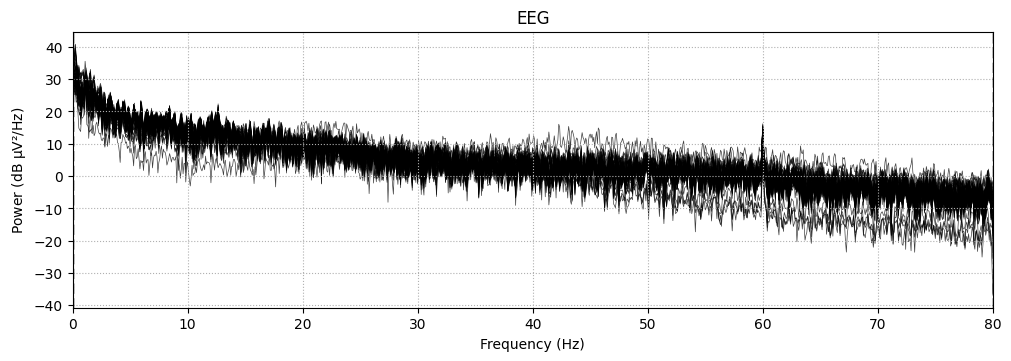

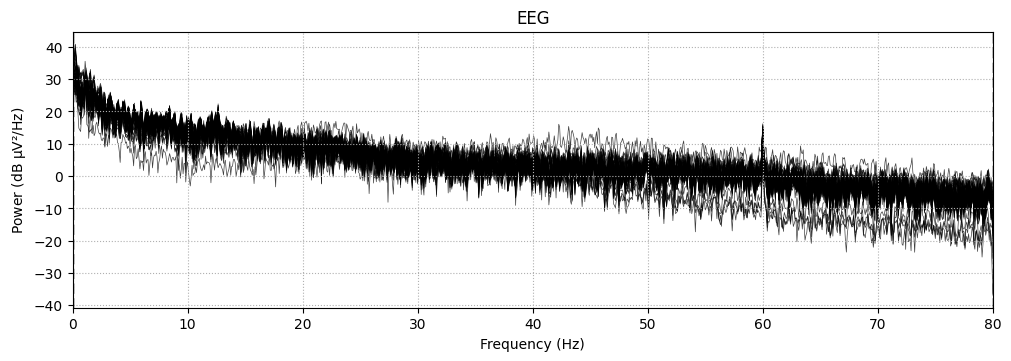

In [124]:
s001_r01_psd = s001_r01_raw.compute_psd()
s001_r01_psd.plot(amplitude=False)